# Software Coaching for Python
# Week 4: Text Data Processing

Instructor: Kang-Pyo Lee 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/Software_Coaching_Fall_2021"
my_folder = "HLP"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

## Install packages

In [ ]:
! pip install --user nltk textblob

## Basic NLP Techniques Using NLTK

In [ ]:
text = "Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was. Now some people say that vaccinating the world is not possible. They’re wrong. As Nelson Mandela, Madiba, said; it always seems impossible until it’s done."
text

'Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was. Now some people say that vaccinating the world is not possible. They’re wrong. As Nelson Mandela, Madiba, said; it always seems impossible until it’s done.'

Suppose you would like to identify sentences in a string. 

In [ ]:
text.split(".")

['Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was',
 ' Now some people say that vaccinating the world is not possible',
 ' They’re wrong',
 ' As Nelson Mandela, Madiba, said; it always seems impossible until it’s done',
 '']

Two problems with simply splitting a sentence with a period: 
- A sentence does not always end with a period. For example, it can also end with a question mark or an exclamation mark.
- A period does not always mean completeness of a sentence, for emample, Ms., Dr., 3.14, etc. 

Now suppose you would also like to identify words in a string. 

In [ ]:
text.split(" ")     # 'was.', 'possible.', 'wrong.', 'said;', 'done.'

['Some',
 'people',
 'did',
 'not',
 'think',
 'it',
 'was',
 'possible',
 'to',
 'produce',
 'a',
 '#COVID19',
 'vaccine',
 'so',
 'quickly,',
 'but',
 'it',
 'was.',
 'Now',
 'some',
 'people',
 'say',
 'that',
 'vaccinating',
 'the',
 'world',
 'is',
 'not',
 'possible.',
 'They’re',
 'wrong.',
 'As',
 'Nelson',
 'Mandela,',
 'Madiba,',
 'said;',
 'it',
 'always',
 'seems',
 'impossible',
 'until',
 'it’s',
 'done.']

Splitting text with a space works generally fine except that it cannot handle punctuation characters such as comma, period, and 's. 

### Sentence Tokenization

In [ ]:
import nltk

nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Natural Language Toolkit (NLTK): https://www.nltk.org/

In [ ]:
sents = nltk.sent_tokenize(text)       # Tokenize text into sentences
sents

['Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was.',
 'Now some people say that vaccinating the world is not possible.',
 'They’re wrong.',
 'As Nelson Mandela, Madiba, said; it always seems impossible until it’s done.']

In [ ]:
len(sents)

4

### Word Tokenization

In [ ]:
words = nltk.word_tokenize(text)        # Tokenize text into words
words

['Some',
 'people',
 'did',
 'not',
 'think',
 'it',
 'was',
 'possible',
 'to',
 'produce',
 'a',
 '#',
 'COVID19',
 'vaccine',
 'so',
 'quickly',
 ',',
 'but',
 'it',
 'was',
 '.',
 'Now',
 'some',
 'people',
 'say',
 'that',
 'vaccinating',
 'the',
 'world',
 'is',
 'not',
 'possible',
 '.',
 'They',
 '’',
 're',
 'wrong',
 '.',
 'As',
 'Nelson',
 'Mandela',
 ',',
 'Madiba',
 ',',
 'said',
 ';',
 'it',
 'always',
 'seems',
 'impossible',
 'until',
 'it',
 '’',
 's',
 'done',
 '.']

Note that each punctuation character is also treated as a token. 

In [ ]:
len(words)

56

### Part-of-Speech (PoS) Tagging

Part-of-speech tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Part-of-speech tagging on Wikipedia: https://en.wikipedia.org/wiki/Part-of-speech_tagging

In [ ]:
tagged_words = nltk.pos_tag(words)          # Tag each word with their part-of-speech tag
tagged_words

[('Some', 'DT'),
 ('people', 'NNS'),
 ('did', 'VBD'),
 ('not', 'RB'),
 ('think', 'VB'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('possible', 'JJ'),
 ('to', 'TO'),
 ('produce', 'VB'),
 ('a', 'DT'),
 ('#', '#'),
 ('COVID19', 'NNP'),
 ('vaccine', 'NN'),
 ('so', 'RB'),
 ('quickly', 'RB'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('.', '.'),
 ('Now', 'RB'),
 ('some', 'DT'),
 ('people', 'NNS'),
 ('say', 'VBP'),
 ('that', 'IN'),
 ('vaccinating', 'VBG'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('possible', 'JJ'),
 ('.', '.'),
 ('They', 'PRP'),
 ('’', 'VBP'),
 ('re', 'JJ'),
 ('wrong', 'JJ'),
 ('.', '.'),
 ('As', 'IN'),
 ('Nelson', 'NNP'),
 ('Mandela', 'NNP'),
 (',', ','),
 ('Madiba', 'NNP'),
 (',', ','),
 ('said', 'VBD'),
 (';', ':'),
 ('it', 'PRP'),
 ('always', 'RB'),
 ('seems', 'VBZ'),
 ('impossible', 'JJ'),
 ('until', 'IN'),
 ('it', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'JJ'),
 ('done', 'VBN'),
 ('.', '.')]

Note that the argument of <b>pos_tag</b> function is a list of words, not raw text. 

Penn Part of Speech Tags: https://cs.nyu.edu/grishman/jet/guide/PennPOS.html

In [ ]:
[word for word, tag in tagged_words if tag in ["NN", "NNS"]]   # Noun, singular or mass; Noun, plural

['people', 'vaccine', 'people', 'world']

In [ ]:
[word for word, tag in tagged_words if tag in ["NNP", "NNPS"]]  # Proper noun, singular; Proper noun, plural

['COVID19', 'Nelson', 'Mandela', 'Madiba']

In [ ]:
[word for word, tag in tagged_words if tag.startswith("NN")]

['people',
 'COVID19',
 'vaccine',
 'people',
 'world',
 'Nelson',
 'Mandela',
 'Madiba']

In [ ]:
[word for word, tag in tagged_words if tag.startswith("JJ")]

['possible', 'possible', 're', 'wrong', 'impossible', 's']

In [ ]:
[word for word, tag in tagged_words if tag.startswith("VB")]

['did',
 'think',
 'was',
 'produce',
 'was',
 'say',
 'vaccinating',
 'is',
 '’',
 'said',
 'seems',
 '’',
 'done']

### Stemming

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.

A computer program or subroutine that stems word may be called a stemming program, stemming algorithm, or stemmer.

Stemming on Wikipedia: https://en.wikipedia.org/wiki/Stemming

In [ ]:
stemmer = nltk.stem.SnowballStemmer("english")

In [ ]:
stemmer.stem("car")

'car'

In [ ]:
stemmer.stem("cars")

'car'

In [ ]:
stemmer.stem("say")

'say'

In [ ]:
stemmer.stem("saying")

'say'

In [ ]:
stemmer.stem("said")

'said'

In [ ]:
[(word, stemmer.stem(word)) for word in words]

[('Some', 'some'),
 ('people', 'peopl'),
 ('did', 'did'),
 ('not', 'not'),
 ('think', 'think'),
 ('it', 'it'),
 ('was', 'was'),
 ('possible', 'possibl'),
 ('to', 'to'),
 ('produce', 'produc'),
 ('a', 'a'),
 ('#', '#'),
 ('COVID19', 'covid19'),
 ('vaccine', 'vaccin'),
 ('so', 'so'),
 ('quickly', 'quick'),
 (',', ','),
 ('but', 'but'),
 ('it', 'it'),
 ('was', 'was'),
 ('.', '.'),
 ('Now', 'now'),
 ('some', 'some'),
 ('people', 'peopl'),
 ('say', 'say'),
 ('that', 'that'),
 ('vaccinating', 'vaccin'),
 ('the', 'the'),
 ('world', 'world'),
 ('is', 'is'),
 ('not', 'not'),
 ('possible', 'possibl'),
 ('.', '.'),
 ('They', 'they'),
 ('’', '’'),
 ('re', 're'),
 ('wrong', 'wrong'),
 ('.', '.'),
 ('As', 'as'),
 ('Nelson', 'nelson'),
 ('Mandela', 'mandela'),
 (',', ','),
 ('Madiba', 'madiba'),
 (',', ','),
 ('said', 'said'),
 (';', ';'),
 ('it', 'it'),
 ('always', 'alway'),
 ('seems', 'seem'),
 ('impossible', 'imposs'),
 ('until', 'until'),
 ('it', 'it'),
 ('’', '’'),
 ('s', 's'),
 ('done', 'done')

### N-grams

An n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. 

Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram"; size 3 is a "trigram".

N-gram on Wikipedia: https://en.wikipedia.org/wiki/N-gram

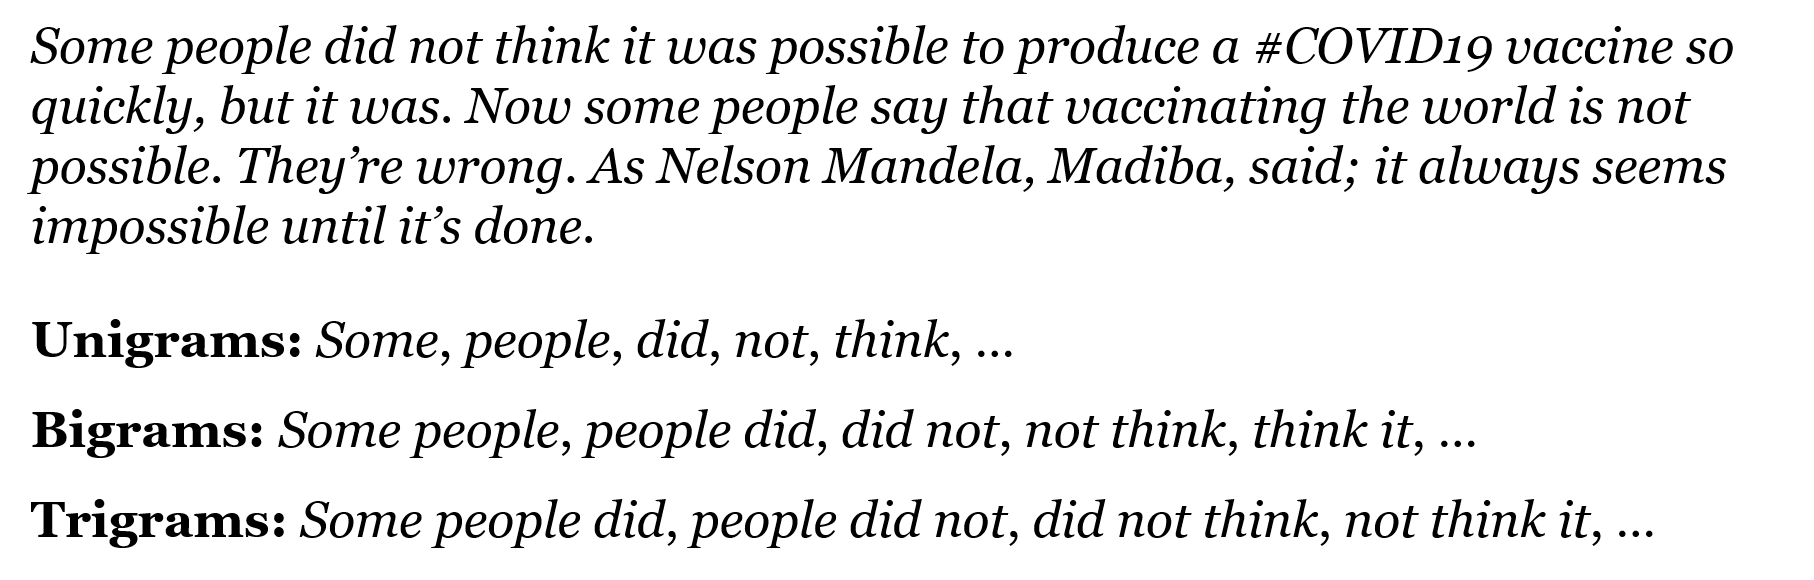

In [ ]:
from IPython.display import Image
Image(f"{classdata_folder}/images/ngram.png")

N-gram models are known to be effective in capturing phrases of multiple words.

In [ ]:
from nltk.util import ngrams

In [ ]:
ngrams(words, 1)

<generator object ngrams at 0x7fd7b787d450>

In [ ]:
list(ngrams(words, 1))

[('Some',),
 ('people',),
 ('did',),
 ('not',),
 ('think',),
 ('it',),
 ('was',),
 ('possible',),
 ('to',),
 ('produce',),
 ('a',),
 ('#',),
 ('COVID19',),
 ('vaccine',),
 ('so',),
 ('quickly',),
 (',',),
 ('but',),
 ('it',),
 ('was',),
 ('.',),
 ('Now',),
 ('some',),
 ('people',),
 ('say',),
 ('that',),
 ('vaccinating',),
 ('the',),
 ('world',),
 ('is',),
 ('not',),
 ('possible',),
 ('.',),
 ('They',),
 ('’',),
 ('re',),
 ('wrong',),
 ('.',),
 ('As',),
 ('Nelson',),
 ('Mandela',),
 (',',),
 ('Madiba',),
 (',',),
 ('said',),
 (';',),
 ('it',),
 ('always',),
 ('seems',),
 ('impossible',),
 ('until',),
 ('it',),
 ('’',),
 ('s',),
 ('done',),
 ('.',)]

Unigrams are practically the same as word tokens. 

In [ ]:
list(ngrams(words, 2))

[('Some', 'people'),
 ('people', 'did'),
 ('did', 'not'),
 ('not', 'think'),
 ('think', 'it'),
 ('it', 'was'),
 ('was', 'possible'),
 ('possible', 'to'),
 ('to', 'produce'),
 ('produce', 'a'),
 ('a', '#'),
 ('#', 'COVID19'),
 ('COVID19', 'vaccine'),
 ('vaccine', 'so'),
 ('so', 'quickly'),
 ('quickly', ','),
 (',', 'but'),
 ('but', 'it'),
 ('it', 'was'),
 ('was', '.'),
 ('.', 'Now'),
 ('Now', 'some'),
 ('some', 'people'),
 ('people', 'say'),
 ('say', 'that'),
 ('that', 'vaccinating'),
 ('vaccinating', 'the'),
 ('the', 'world'),
 ('world', 'is'),
 ('is', 'not'),
 ('not', 'possible'),
 ('possible', '.'),
 ('.', 'They'),
 ('They', '’'),
 ('’', 're'),
 ('re', 'wrong'),
 ('wrong', '.'),
 ('.', 'As'),
 ('As', 'Nelson'),
 ('Nelson', 'Mandela'),
 ('Mandela', ','),
 (',', 'Madiba'),
 ('Madiba', ','),
 (',', 'said'),
 ('said', ';'),
 (';', 'it'),
 ('it', 'always'),
 ('always', 'seems'),
 ('seems', 'impossible'),
 ('impossible', 'until'),
 ('until', 'it'),
 ('it', '’'),
 ('’', 's'),
 ('s', 'done')

In [ ]:
[" ".join(gram) for gram in ngrams(words, 2)]

['Some people',
 'people did',
 'did not',
 'not think',
 'think it',
 'it was',
 'was possible',
 'possible to',
 'to produce',
 'produce a',
 'a #',
 '# COVID19',
 'COVID19 vaccine',
 'vaccine so',
 'so quickly',
 'quickly ,',
 ', but',
 'but it',
 'it was',
 'was .',
 '. Now',
 'Now some',
 'some people',
 'people say',
 'say that',
 'that vaccinating',
 'vaccinating the',
 'the world',
 'world is',
 'is not',
 'not possible',
 'possible .',
 '. They',
 'They ’',
 '’ re',
 're wrong',
 'wrong .',
 '. As',
 'As Nelson',
 'Nelson Mandela',
 'Mandela ,',
 ', Madiba',
 'Madiba ,',
 ', said',
 'said ;',
 '; it',
 'it always',
 'always seems',
 'seems impossible',
 'impossible until',
 'until it',
 'it ’',
 '’ s',
 's done',
 'done .']

In [ ]:
[" ".join(gram) for gram in ngrams(words, 3)]

['Some people did',
 'people did not',
 'did not think',
 'not think it',
 'think it was',
 'it was possible',
 'was possible to',
 'possible to produce',
 'to produce a',
 'produce a #',
 'a # COVID19',
 '# COVID19 vaccine',
 'COVID19 vaccine so',
 'vaccine so quickly',
 'so quickly ,',
 'quickly , but',
 ', but it',
 'but it was',
 'it was .',
 'was . Now',
 '. Now some',
 'Now some people',
 'some people say',
 'people say that',
 'say that vaccinating',
 'that vaccinating the',
 'vaccinating the world',
 'the world is',
 'world is not',
 'is not possible',
 'not possible .',
 'possible . They',
 '. They ’',
 'They ’ re',
 '’ re wrong',
 're wrong .',
 'wrong . As',
 '. As Nelson',
 'As Nelson Mandela',
 'Nelson Mandela ,',
 'Mandela , Madiba',
 ', Madiba ,',
 'Madiba , said',
 ', said ;',
 'said ; it',
 '; it always',
 'it always seems',
 'always seems impossible',
 'seems impossible until',
 'impossible until it',
 'until it ’',
 'it ’ s',
 '’ s done',
 's done .']

Note that while n-grams are able to capture meaningful phrases in text, they may generate much noise. 

## NLP Techniques Using TextBlob

TextBlob: https://textblob.readthedocs.io/

In [ ]:
from textblob import TextBlob

### Sentiment Analysis

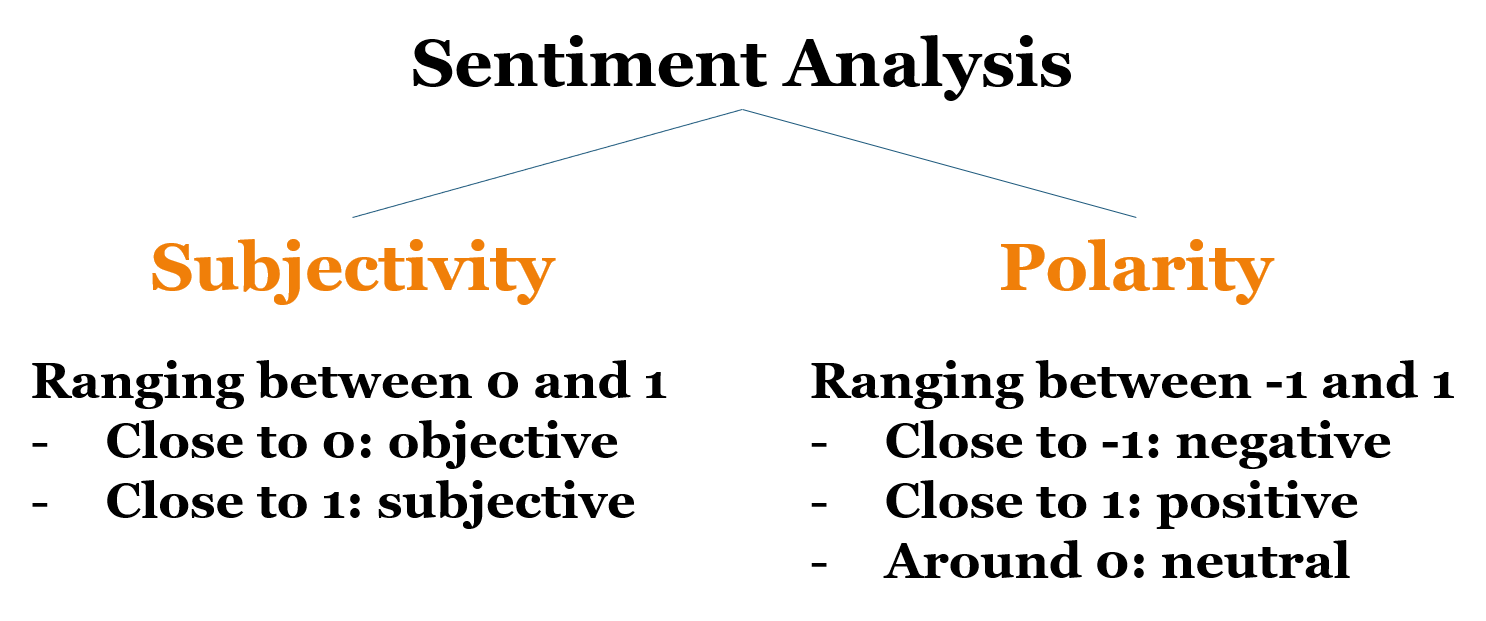

In [ ]:
Image(f"{classdata_folder}/images/sentiment_analysis.png")

In [ ]:
text = "It's just awesome!"

In [ ]:
tb = TextBlob(text)

In [ ]:
tb.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [ ]:
tb.sentiment.polarity

0.0

In [ ]:
tb.sentiment.subjectivity

0.0

In [ ]:
text = "It's Friday."

In [ ]:
tb = TextBlob(text)
tb.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
text = "hey what are you doing, is it good?"
tb = TextBlob(text)
tb.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

## Loading Data

In [ ]:
# urls = ["https://fivethirtyeight.com/features/"]

# for i in range(2, 151):
#     url = f"https://fivethirtyeight.com/features/page/{i}/"
#     urls.append(url)

# import requests
# from bs4 import BeautifulSoup
# import time

# for url in urls:
#     print(url)
    
#     ####################################################
#     # Get the content of a page
#     ####################################################
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, "html.parser")
    
#     ####################################################
#     # Get the list of articles
#     ####################################################
#     h2_list = soup.find_all("h2", {"class": "article-title entry-title"})
    
#     for h2 in h2_list:
#         ####################################################
#         # Find the anchor tag
#         ####################################################
#         a = h2.find("a")
        
#         ####################################################
#         # Extract the title & URL of an article
#         ####################################################
#         title = a.text
#         article_url = a["href"]
        
#         ####################################################
#         # Fetch the content and save it as an HTML file
#         ####################################################
#         print("- " + article_url + ": processing...")
        
#         r2 = requests.get(article_url)
                
#         if "/features/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/features/"):-1] + ".html"
#         elif "/videos/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/videos/"):-1] + ".html"
#         elif "/methodology/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/methodology/"):-1] + ".html"
#         elif "/live-blog/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/live-blog/"):-1] + ".html"
#         else:
#           assert 0 == 1, "Unknown article url pattern!"

#         with open(f"{outcome_folder}/HTMLs/{file_name}", "w+b") as fw:
#             fw.write(r2.content)
        
#         print("- " + file_name + ": saved.")
        
#         ####################################################
#         # Sleep for a second to not overload the web site
#         ####################################################
#         time.sleep(1)
    
#     print()

In [ ]:
# import os
# from bs4 import BeautifulSoup

# html_files = [file for file in os.listdir(f"{outcome_folder}/HTMLs") if file.endswith(".html")]

# with open(f"{outcome_folder}/html_data.csv", "w") as fw:
#     ####################################################
#     # Column names on the first row
#     ####################################################
#     fw.write("file_name\ttitle\tauthor\tdatetime\tbody\n")

#     for file_name in html_files:
#         ####################################################
#         # Column values starting from the second row
#         ####################################################
#         with open(f"{outcome_folder}/HTMLs/{file_name}", "r+b") as fr:
#             print(file_name)
#             soup = BeautifulSoup(fr.read(), "html.parser")

#             ####################################################
#             # No title exception handling
#             ####################################################
#             if soup.find("h1", {"class": "article-title article-title-single entry-title"}) == None:
#                 continue
#             else:
#                 article_title = soup.find("h1", {"class": "article-title article-title-single entry-title"}).text.strip()
            
#             ####################################################
#             # No author exception handling
#             ####################################################
#             if soup.find("a", {"class": "author url fn"}) == None:
#                 article_author = ""
#             else:
#                 article_author = soup.find("a", {"class": "author url fn"}).text
            
#             ####################################################
#             # Remove all possible tabs
#             ####################################################
#             article_title = article_title.replace("\t", "")
#             article_aurthor = article_author.replace("\t", "")

#             ####################################################
#             # No datetime exception handling
#             ####################################################
#             if soup.find("time", {"class": "datetime"}) == None:
#                 article_datetime = ""
#             else:
#                 article_datetime = soup.find("time", {"class": "datetime"}).text

#             article_body = soup.find("div", attrs={"class": "entry-content single-post-content"}).text.replace("\n", " ").replace("\t", " ").strip()
                        
#             fw.write(f"{file_name}\t{article_title}\t{article_author}\t{article_datetime}\t{article_body}\n")

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{classdata_folder}/html_data.csv", sep="\t")
df

,file_name,title,author,datetime,body
0,the-red-sox-seemed-unstoppable-then-the-astros-turned-the-tables.html,The Red Sox Seemed Unstoppable. Then The Astros Turned The Tables.,Neil Paine,"Oct. 22, 2021","Just a couple of days ago, the Houston Astros were in big trouble. Luis García and José Urquidy — the starting pitchers for Games 2 and 3 of the A..."
1,who-betrayed-dunes-duke-leto.html,Who Betrayed Dune’s Duke Leto?,Zach Wissner-Gross,"Oct. 22, 2021","Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a..."
2,adam-schiff-says-theres-no-magic-button-to-push-to-protect-democracy.html,Adam Schiff Says ‘There’s No Magic Button To Push’ To Protect Democracy,NaN,"Oct. 22, 2021","In this installment of the FiveThirtyEight Politics podcast, Democratic Rep. Adam Schiff of California discusses why he thinks American democracy ..."
3,a-majority-of-republican-voters-actively-want-trump-to-run-for-president-again.html,A Majority Of Republican Voters Actively Want Trump To Run For President Again,Nathaniel Rakich,"Oct. 22, 2021","Welcome to Pollapalooza, our weekly polling roundup. By all appearances, former President Donald Trump is planning to run for president again in ..."
4,the-accs-best-playoff-hope-is-pittsburgh-yes-really.html,"The ACC’s Best Playoff Hope Is Pittsburgh. Yes, Really.",Santul Nerkar,"Oct. 21, 2021",The Atlantic Coast Conference started the 2021 college football season with reason for title-contending hope. Three ACC teams ranked in the top 15...
...,...,...,...,...,...
1300,the-challenges-of-holding-an-election-during-a-pandemic.html,The Challenges Of Holding An Election During A Pandemic,Galen Druke,"Sep. 11, 2020","In this episode of the FiveThirtyEight Politics podcast, Galen Druke speaks with Ohio Secretary of State Frank LaRose about what LaRose is doing t..."
1301,which-players-have-a-shot-at-becoming-wnba-rookie-of-the-year.html,Which Players Have A Shot At Becoming WNBA Rookie Of The Year?,Howard Megdal,"Sep. 11, 2020","Of all the WNBA awards, Rookie of the Year may have the most amorphous definition. Most Valuable Player tends to favor how well a player does at l..."
1302,the-nationals-are-running-out-of-time.html,The Nationals Are Running Out Of Time,Neil Paine,"Sep. 11, 2020","The Washington Nationals are no strangers to long-shot comeback bids. At multiple junctures in last year’s World Series run, their odds of being e..."
1303,confidence-interval-will-texas-go-blue-in-2020.html,Confidence Interval: Will Texas Go Blue In 2020?,Galen Druke,"Sep. 11, 2020","Welcome to another episode of Confidence Interval, where we make a persuasive case for a hot take … and then reveal how confident we really feel a..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1305 non-null   object
 1   title      1305 non-null   object
 2   author     1191 non-null   object
 3   datetime   1297 non-null   object
 4   body       1293 non-null   object
dtypes: object(5)
memory usage: 51.1+ KB


In [ ]:
df.datetime = df.datetime.astype("datetime64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   file_name  1305 non-null   object        
 1   title      1305 non-null   object        
 2   author     1191 non-null   object        
 3   datetime   1297 non-null   datetime64[ns]
 4   body       1293 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 51.1+ KB


In [ ]:
df.head(10)

,file_name,title,author,datetime,body
0,the-red-sox-seemed-unstoppable-then-the-astros-turned-the-tables.html,The Red Sox Seemed Unstoppable. Then The Astros Turned The Tables.,Neil Paine,2021-10-22,"Just a couple of days ago, the Houston Astros were in big trouble. Luis García and José Urquidy — the starting pitchers for Games 2 and 3 of the A..."
1,who-betrayed-dunes-duke-leto.html,Who Betrayed Dune’s Duke Leto?,Zach Wissner-Gross,2021-10-22,"Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a..."
2,adam-schiff-says-theres-no-magic-button-to-push-to-protect-democracy.html,Adam Schiff Says ‘There’s No Magic Button To Push’ To Protect Democracy,NaN,2021-10-22,"In this installment of the FiveThirtyEight Politics podcast, Democratic Rep. Adam Schiff of California discusses why he thinks American democracy ..."
3,a-majority-of-republican-voters-actively-want-trump-to-run-for-president-again.html,A Majority Of Republican Voters Actively Want Trump To Run For President Again,Nathaniel Rakich,2021-10-22,"Welcome to Pollapalooza, our weekly polling roundup. By all appearances, former President Donald Trump is planning to run for president again in ..."
4,the-accs-best-playoff-hope-is-pittsburgh-yes-really.html,"The ACC’s Best Playoff Hope Is Pittsburgh. Yes, Really.",Santul Nerkar,2021-10-21,The Atlantic Coast Conference started the 2021 college football season with reason for title-contending hope. Three ACC teams ranked in the top 15...
5,the-raiders-had-more-black-players-than-any-nfl-team-then-jon-gruden-took-over-the-roster.html,The Raiders Had More Black Players Than Any NFL Team. Then Jon Gruden Took Over The Roster.,Michael Tesler,2021-10-21,"Years before Jon Gruden resigned in disgrace as the Las Vegas Raiders’ head coach over a series of racist, misogynistic and homophobic emails, Chi..."
6,biden-has-lost-support-across-all-groups-of-americans-but-especially-independents-and-hispanics.html,Biden Has Lost Support Across All Groups Of Americans — But Especially Independents And Hispanics,Geoffrey Skelley,2021-10-21,"Over his first nine months in office, President Biden has lost support among Americans of all stripes — men and women, Black voters and white vote..."
7,how-democrats-failure-to-pass-a-voting-rights-bill-fits-a-pattern-of-failing-voters-of-color.html,How Democrats’ Failure To Pass A Voting Rights Bill Fits A Pattern Of Failing Voters Of Color,Alex Samuels,2021-10-20,"Before President Biden entered the White House, he had an impressive list of to-dos on his agenda, including but not limited to: passing federal v..."
8,many-of-the-nhls-best-teams-are-still-getting-to-know-their-goalies.html,Many Of The NHL’s Best Teams Are Still Getting To Know Their Goalies,Neil Paine,2021-10-20,One of the big themes of the NHL in 2021-22 has been change between the pipes. There was no shortage of goalies — some quite accomplished — on the...
9,anthony-edwards-found-his-rhythm-late-last-season-can-he-help-minnesota-find-the-playoffs.html,Anthony Edwards Found His Rhythm Late Last Season. Can He Help Minnesota Find The Playoffs?,James L. Jackson,2021-10-20,"In 2007, the Minnesota Timberwolves traded Hall of Famer Kevin Garnett, kicking off a decade and a half during which the team ranked last in the l..."


In [ ]:
df.tail(10)

,file_name,title,author,datetime,body
1295,everything-should-be-on-the-table-for-the-houston-rockets-even-james-hardens-future.html,Everything Should Be On The Table For The Houston Rockets. Even James Harden’s Future.,Chris Herring,2020-09-14,"It didn’t take long for the Wrecking Ball of Consequence to come swinging into the Houston Rockets’ living room. On Sunday, less than 24 hours aft..."
1296,do-you-buy-that-donald-trump-is-performing-well-with-hispanic-voters.html,Do You Buy That … Donald Trump Is Performing Well With Hispanic Voters?,Nate Silver,2020-09-14,NaN
1297,why-coming-up-with-effective-interventions-to-address-covid-19-is-so-hard.html,Why Coming Up With Effective Interventions To Address COVID-19 Is So Hard,Neil Lewis Jr.,2020-09-14,It has been hard to measure the effects of the novel coronavirus. Not only is COVID-19 far-reaching — it’s touched nearly every corner of the glob...
1298,what-if-trump-loses-and-wont-leave.html,What If Trump Loses And Won’t Leave?,Geoffrey Skelley,2020-09-14,"UPDATE (September 24, 2020, 9:15 a.m.): On Wednesday, President Trump refused to say whether he would commit to a peaceful transition of power if ..."
1299,why-a-covid-19-vaccine-trial-would-press-pause.html,Why A COVID-19 Vaccine Trial Would Press Pause,Anna Rothschild,2020-09-13,"On this week’s episode of PODCAST-19, we discuss the news that AstraZeneca’s COVID-19 vaccine trial has been paused because of a severe side effec..."
1300,the-challenges-of-holding-an-election-during-a-pandemic.html,The Challenges Of Holding An Election During A Pandemic,Galen Druke,2020-09-11,"In this episode of the FiveThirtyEight Politics podcast, Galen Druke speaks with Ohio Secretary of State Frank LaRose about what LaRose is doing t..."
1301,which-players-have-a-shot-at-becoming-wnba-rookie-of-the-year.html,Which Players Have A Shot At Becoming WNBA Rookie Of The Year?,Howard Megdal,2020-09-11,"Of all the WNBA awards, Rookie of the Year may have the most amorphous definition. Most Valuable Player tends to favor how well a player does at l..."
1302,the-nationals-are-running-out-of-time.html,The Nationals Are Running Out Of Time,Neil Paine,2020-09-11,"The Washington Nationals are no strangers to long-shot comeback bids. At multiple junctures in last year’s World Series run, their odds of being e..."
1303,confidence-interval-will-texas-go-blue-in-2020.html,Confidence Interval: Will Texas Go Blue In 2020?,Galen Druke,2020-09-11,"Welcome to another episode of Confidence Interval, where we make a persuasive case for a hot take … and then reveal how confident we really feel a..."
1304,can-you-reach-the-summit-first.html,Can You Reach The Summit First?,Zach Wissner-Gross,2020-09-11,"Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a..."


## Adding New Columns

In [ ]:
df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

In [ ]:
df

,file_name,title,author,datetime,body,words,tagged_words
0,the-red-sox-seemed-unstoppable-then-the-astros-turned-the-tables.html,The Red Sox Seemed Unstoppable. Then The Astros Turned The Tables.,Neil Paine,2021-10-22,"Just a couple of days ago, the Houston Astros were in big trouble. Luis García and José Urquidy — the starting pitchers for Games 2 and 3 of the A...","[The, Red, Sox, Seemed, Unstoppable, ., Then, The, Astros, Turned, The, Tables, .]","[(The, DT), (Red, NNP), (Sox, NNP), (Seemed, NNP), (Unstoppable, NNP), (., .), (Then, RB), (The, DT), (Astros, NNP), (Turned, VBD), (The, DT), (Ta..."
1,who-betrayed-dunes-duke-leto.html,Who Betrayed Dune’s Duke Leto?,Zach Wissner-Gross,2021-10-22,"Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a...","[Who, Betrayed, Dune, ’, s, Duke, Leto, ?]","[(Who, WP), (Betrayed, VBD), (Dune, NNP), (’, NNP), (s, VBD), (Duke, NNP), (Leto, NNP), (?, .)]"
2,adam-schiff-says-theres-no-magic-button-to-push-to-protect-democracy.html,Adam Schiff Says ‘There’s No Magic Button To Push’ To Protect Democracy,NaN,2021-10-22,"In this installment of the FiveThirtyEight Politics podcast, Democratic Rep. Adam Schiff of California discusses why he thinks American democracy ...","[Adam, Schiff, Says, ‘, There, ’, s, No, Magic, Button, To, Push, ’, To, Protect, Democracy]","[(Adam, NNP), (Schiff, NNP), (Says, NNP), (‘, NNP), (There, EX), (’, NNP), (s, VBD), (No, DT), (Magic, NNP), (Button, NNP), (To, TO), (Push, VB), ..."
3,a-majority-of-republican-voters-actively-want-trump-to-run-for-president-again.html,A Majority Of Republican Voters Actively Want Trump To Run For President Again,Nathaniel Rakich,2021-10-22,"Welcome to Pollapalooza, our weekly polling roundup. By all appearances, former President Donald Trump is planning to run for president again in ...","[A, Majority, Of, Republican, Voters, Actively, Want, Trump, To, Run, For, President, Again]","[(A, DT), (Majority, NNP), (Of, IN), (Republican, NNP), (Voters, NNP), (Actively, NNP), (Want, NNP), (Trump, NNP), (To, TO), (Run, VB), (For, IN),..."
4,the-accs-best-playoff-hope-is-pittsburgh-yes-really.html,"The ACC’s Best Playoff Hope Is Pittsburgh. Yes, Really.",Santul Nerkar,2021-10-21,The Atlantic Coast Conference started the 2021 college football season with reason for title-contending hope. Three ACC teams ranked in the top 15...,"[The, ACC, ’, s, Best, Playoff, Hope, Is, Pittsburgh, ., Yes, ,, Really, .]","[(The, DT), (ACC, NNP), (’, NNP), (s, NN), (Best, NNP), (Playoff, NNP), (Hope, NNP), (Is, VBZ), (Pittsburgh, NNP), (., .), (Yes, UH), (,, ,), (Rea..."
...,...,...,...,...,...,...,...
1300,the-challenges-of-holding-an-election-during-a-pandemic.html,The Challenges Of Holding An Election During A Pandemic,Galen Druke,2020-09-11,"In this episode of the FiveThirtyEight Politics podcast, Galen Druke speaks with Ohio Secretary of State Frank LaRose about what LaRose is doing t...","[The, Challenges, Of, Holding, An, Election, During, A, Pandemic]","[(The, DT), (Challenges, NNP), (Of, IN), (Holding, VBG), (An, DT), (Election, NN), (During, IN), (A, DT), (Pandemic, NNP)]"
1301,which-players-have-a-shot-at-becoming-wnba-rookie-of-the-year.html,Which Players Have A Shot At Becoming WNBA Rookie Of The Year?,Howard Megdal,2020-09-11,"Of all the WNBA awards, Rookie of the Year may have the most amorphous definition. Most Valuable Player tends to favor how well a player does at l...","[Which, Players, Have, A, Shot, At, Becoming, WNBA, Rookie, Of, The, Year, ?]","[(Which, JJ), (Players, NNS), (Have, VBP), (A, DT), (Shot, NN), (At, IN), (Becoming, NNP), (WNBA, NNP), (Rookie, NNP), (Of, IN), (The, DT), (Year,..."
1302,the-nationals-are-running-out-of-time.html,The Nationals Are Running Out Of Time,Neil Paine,2020-09-11,"The Washington Nationals are no strangers to long-shot comeback bids. At multiple junctures in last year’s World Series run, their odds of being e...",

## Popular Keywords Ranking

In [ ]:
df[["tagged_words"]]

,tagged_words
0,"[(The, DT), (Red, NNP), (Sox, NNP), (Seemed, NNP), (Unstoppable, NNP), (., .), (Then, RB), (The, DT), (Astros, NNP), (Turned, VBD), (The, DT), (Ta..."
1,"[(Who, WP), (Betrayed, VBD), (Dune, NNP), (’, NNP), (s, VBD), (Duke, NNP), (Leto, NNP), (?, .)]"
2,"[(Adam, NNP), (Schiff, NNP), (Says, NNP), (‘, NNP), (There, EX), (’, NNP), (s, VBD), (No, DT), (Magic, NNP), (Button, NNP), (To, TO), (Push, VB), ..."
3,"[(A, DT), (Majority, NNP), (Of, IN), (Republican, NNP), (Voters, NNP), (Actively, NNP), (Want, NNP), (Trump, NNP), (To, TO), (Run, VB), (For, IN),..."
4,"[(The, DT), (ACC, NNP), (’, NNP), (s, NN), (Best, NNP), (Playoff, NNP), (Hope, NNP), (Is, VBZ), (Pittsburgh, NNP), (., .), (Yes, UH), (,, ,), (Rea..."
...,...
1300,"[(The, DT), (Challenges, NNP), (Of, IN), (Holding, VBG), (An, DT), (Election, NN), (During, IN), (A, DT), (Pandemic, NNP)]"
1301,"[(Which, JJ), (Players, NNS), (Have, VBP), (A, DT), (Shot, NN), (At, IN), (Becoming, NNP), (WNBA, NNP), (Rookie, NNP), (Of, IN), (The, DT), (Year,..."
1302,"[(The, DT), (Nationals, NNS), (Are, VBP), (Running, VBG), (Out, NNP), (Of, IN), (Time, NNP)]"
1303,"[(Confidence, NN), (Interval, NN), (:, :), (Will, NNP), (Texas, NNP), (Go, NNP), (Blue, NNP), (In, IN), (2020, CD), (?, .)]"


In [ ]:
from collections import Counter

collections.Counter: https://docs.python.org/3/library/collections.html#collections.Counter

In [ ]:
counter = Counter()          # The counter object will have all the word count information

for l in df.tagged_words:
    word_set = set() #중복 허용 x
    
    for t in l:
        word = t[0].lower()  # Convert all words to lowercase
        word_set.add(word)
    counter.update(word_set) # Be aware of the indentation!

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
{'consistent', 'be', '?', 'are', 'exploitable', 'play-callers', 'enough', 'to', 'defensive'}
{'it'}
{'it', '’'}
{'s', 'it', '’'}
{'s', 'it', '’', 'hard'}
{'not', 'hard', 's', 'it', '’'}
{'not', 'hard', 's', 'it', 'to', '’'}
{'not', 'hard', 's', 'it', 'to', '’', 'believe'}
{'not', 'hard', 's', 'it', 'to', 'in', '’', 'believe'}
{'luka', 'not', 'hard', 's', 'it', 'to', 'in', '’', 'believe'}
{'dončić', 'luka', 'not', 'hard', 's', 'it', 'to', 'in', '’', 'believe'}
{'california'}
{'california', '’'}
{'california', 's', '’'}
{'california', 's', '’', 'new'}
{'california', 's', 'senator', '’', 'new'}
{'will', 'california', 's', 'senator', '’', 'new'}
{'make', 'will', 'california', 's', 'senator', '’', 'new'}
{'make', 'will', 'history', 'california', 's', 'senator', '’', 'new'}
{'make', 'will', '.', 'history', 'california', 's', 'senator', '’', 'new'}
{'make', 'will', '.', 'history', 'california', 's', 'but', 'senator', '’', 'new'}
{'can', 'make', 'will', '.',

Note that you converted each word to lowercase to avoid any potential variations due to the case sensitivity. 

Note also that you used a set to remove duplicate words in a tweet. This allows you to count each word in a tweet as just 1, even if it appears more than once in the tweet. 

In [ ]:
from IPython.display import Image
Image(f"{classdata_folder}/images/word_count.png")

In [ ]:
counter.most_common(50)   # Show the top-n most popular words in counter

[('the', 735),
 ('’', 498),
 ('?', 371),
 ('s', 306),
 ('to', 271),
 ('a', 261),
 ('in', 227),
 ('.', 215),
 ('of', 190),
 ('is', 187),
 ('and', 183),
 ('are', 162),
 ('how', 157),
 ('t', 149),
 ('what', 143),
 (',', 141),
 ('can', 139),
 ('why', 137),
 ('for', 126),
 ('it', 114),
 ('you', 112),
 ('trump', 95),
 ('that', 94),
 ('but', 86),
 ('about', 84),
 ('on', 83),
 ('will', 79),
 ('this', 78),
 ('democrats', 75),
 ('have', 73),
 ('be', 72),
 ('we', 65),
 ('biden', 64),
 ('americans', 61),
 ('has', 60),
 ('their', 60),
 ('could', 59),
 ('election', 59),
 ('they', 58),
 ('so', 57),
 ('—', 56),
 ('do', 56),
 ('covid-19', 50),
 ('republicans', 50),
 ('more', 47),
 ('…', 47),
 ('with', 47),
 ('from', 45),
 ('2020', 45),
 ('win', 42)]

collections.Counter.most_common: https://docs.python.org/3/library/collections.html#collections.Counter.most_common

Stopwords are words that are filtered out before processing of natural language text. Stopwords are generally the most common words in a language. There is no single universal list of stopwords used by all natural language processing tools, and indeed not all tools even use such a list. Some tools avoid removing stop words to support phrase search.

Stopwords on Wikipedia: https://en.wikipedia.org/wiki/Stop_words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
global_stopwords = stopwords.words("english") 
global_stopwords[:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

Stopwords, in fact, have no meaning in terms of keyword analysis.

In [ ]:
counter = Counter()

for l in df.tagged_words:
    word_set = set()
    
    for t in l:
        word = t[0].lower()
        
        if word not in global_stopwords:   # Check if the word is a stopword
            word_set.add(word)
            
    counter.update(word_set)
    
counter.most_common(30)

[('’', 498),
 ('?', 371),
 ('.', 215),
 (',', 141),
 ('trump', 95),
 ('democrats', 75),
 ('biden', 64),
 ('americans', 61),
 ('could', 59),
 ('election', 59),
 ('—', 56),
 ('covid-19', 50),
 ('republicans', 50),
 ('…', 47),
 ('2020', 45),
 ('win', 42),
 ('season', 41),
 ('like', 36),
 ('‘', 34),
 ('new', 34),
 ('year', 32),
 ('nfl', 31),
 (')', 31),
 ('(', 31),
 ('teams', 30),
 ('best', 29),
 ('big', 29),
 ('georgia', 29),
 ('college', 29),
 ('senate', 29)]

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
local_stopwords = [c for c in string.punctuation] +\
                  ['‘', '’', '—', '…']
local_stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '‘',
 '’',
 '—',
 '…']

Note that the words *health*, *mental*, and *mentalhealth* were included in the local stopwords, as they are search terms so every tweet must have any of those words, which makes them not so meaningful in terms of keyword analysis. 

In [ ]:
counter = Counter()
for l in df.tagged_words:
    word_set = set()
    
    for t in l:
        word = t[0].lower()
        
        if word not in (global_stopwords + local_stopwords):
        # Check if the word is either a global or a local stopword
            word_set.add(word)
            
    counter.update(word_set)
    
counter.most_common(30)

[('trump', 95),
 ('democrats', 75),
 ('biden', 64),
 ('americans', 61),
 ('could', 59),
 ('election', 59),
 ('covid-19', 50),
 ('republicans', 50),
 ('2020', 45),
 ('win', 42),
 ('season', 41),
 ('like', 36),
 ('new', 34),
 ('year', 32),
 ('nfl', 31),
 ('teams', 30),
 ('best', 29),
 ('big', 29),
 ('georgia', 29),
 ('college', 29),
 ('senate', 29),
 ('watch', 29),
 ('still', 27),
 ('court', 27),
 ('back', 27),
 ('might', 27),
 ('football', 27),
 ('buy', 26),
 ('politics', 26),
 ('nba', 26)]

In [ ]:
counter["trump"]

95

[링크 텍스트](https://)The word '*trump*' appears 95 times in the corpus. 

In [ ]:
[(word, count) for word, count in counter.items() if count > 50]

[('trump', 95),
 ('biden', 64),
 ('americans', 61),
 ('democrats', 75),
 ('could', 59),
 ('election', 59)]

### Popular Nouns 

In [ ]:
counter1 = Counter()
for l in df.tagged_words:
    word_set = set()
    
    for t in l:
        word = t[0].lower()
        tag = t[1]
        
        if tag.startswith("NN") & (word not in (global_stopwords + local_stopwords)):
            word_set.add(word)
            
    counter1.update(word_set)
    
counter1.most_common(30)

[('trump', 95),
 ('democrats', 73),
 ('biden', 64),
 ('americans', 61),
 ('election', 59),
 ('could', 51),
 ('republicans', 50),
 ('covid-19', 43),
 ('season', 41),
 ('new', 34),
 ('year', 32),
 ('nfl', 31),
 ('teams', 30),
 ('georgia', 29),
 ('college', 29),
 ('senate', 29),
 ('court', 27),
 ('football', 27),
 ('politics', 26),
 ('house', 26),
 ('gop', 26),
 ('race', 25),
 ('nba', 25),
 ('big', 24),
 ('vaccine', 24),
 ('far', 24),
 ('supreme', 23),
 ('polls', 23),
 ('us', 23),
 ('white', 23)]

### Popular Adjectives 

In [ ]:
counter2 = Counter()
for l in df.tagged_words:
    word_set = set()
    
    for t in l:
        word = t[0].lower()
        tag = t[1]
        
        if tag.startswith("JJ") & (word not in (global_stopwords + local_stopwords)):
            word_set.add(word)
            
    counter2.update(word_set)
    
counter2.most_common(30)

[('much', 17),
 ('many', 14),
 ('political', 14),
 ('best', 10),
 ('next', 8),
 ('last', 7),
 ('democratic', 7),
 ('good', 7),
 ('republican', 7),
 ('covid-19', 7),
 ('american', 7),
 ('special', 6),
 ('conservative', 5),
 ('early', 5),
 ('big', 5),
 ('local', 4),
 ('sure', 4),
 ('better', 3),
 ('unlikely', 3),
 ('harder', 3),
 ('clear', 3),
 ('popular', 3),
 ('presidential', 3),
 ('important', 3),
 ('easier', 2),
 ('least', 2),
 ('older', 2),
 ('week', 2),
 ('all-time', 2),
 ('long', 2)]

### Popular Verbs

In [ ]:
counter3 = Counter()
for l in df.tagged_words:
    word_set = set()
    
    for t in l:
        word = t[0].lower()
        tag = t[1]
        
        if tag.startswith("VB") & (word not in (global_stopwords + local_stopwords)):
            word_set.add(word)
            
    counter3.update(word_set)
    
counter3.most_common(30)

[('watch', 26),
 ('buy', 25),
 ('win', 19),
 ('think', 17),
 ('make', 16),
 ('know', 16),
 ('get', 13),
 ('getting', 12),
 ('want', 12),
 ('going', 12),
 ('made', 12),
 ('take', 11),
 ('need', 10),
 ('making', 10),
 ('changed', 10),
 ('voted', 8),
 ('trying', 8),
 ('running', 8),
 ('say', 8),
 ('lost', 6),
 ('says', 6),
 ('solve', 6),
 ('turned', 5),
 ('playing', 5),
 ('keep', 5),
 ('go', 5),
 ('lose', 5),
 ('find', 5),
 ('hold', 5),
 ('used', 5)]

## Putting Everything Together into a Single Function

In [ ]:
def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!
        
    return counter

In [ ]:
counter_all = get_counter(df, global_stopwords+local_stopwords)
counter_all.most_common(30)

[('trump', 95),
 ('democrats', 75),
 ('biden', 64),
 ('americans', 61),
 ('could', 59),
 ('election', 59),
 ('covid-19', 50),
 ('republicans', 50),
 ('2020', 45),
 ('win', 42),
 ('season', 41),
 ('like', 36),
 ('new', 34),
 ('year', 32),
 ('nfl', 31),
 ('teams', 30),
 ('best', 29),
 ('big', 29),
 ('georgia', 29),
 ('college', 29),
 ('senate', 29),
 ('watch', 29),
 ('still', 27),
 ('court', 27),
 ('back', 27),
 ('might', 27),
 ('football', 27),
 ('buy', 26),
 ('politics', 26),
 ('nba', 26)]

In [ ]:
counter_adj = get_counter(df, global_stopwords+local_stopwords, "JJ")
counter_adj.most_common(30)

[('much', 17),
 ('many', 14),
 ('political', 14),
 ('best', 10),
 ('next', 8),
 ('last', 7),
 ('democratic', 7),
 ('good', 7),
 ('republican', 7),
 ('covid-19', 7),
 ('american', 7),
 ('special', 6),
 ('conservative', 5),
 ('early', 5),
 ('big', 5),
 ('local', 4),
 ('sure', 4),
 ('better', 3),
 ('unlikely', 3),
 ('harder', 3),
 ('clear', 3),
 ('popular', 3),
 ('presidential', 3),
 ('important', 3),
 ('easier', 2),
 ('least', 2),
 ('older', 2),
 ('week', 2),
 ('all-time', 2),
 ('long', 2)]

## Create Time Series Data

In [ ]:
count = pd.Series(data=1, index=df.datetime).resample(rule="w").count()
count

datetime
2020-09-13     6
2020-09-20    31
2020-09-27    33
2020-10-04    32
2020-10-11    38
              ..
2021-10-10    23
2021-10-17    19
2021-10-24    22
2021-10-31    25
2021-11-07    18
Length: 61, dtype: int64

The `rule` argument value takes
- "h": hourly
- "d": daily
- "w": weekly
- "m": monthly
- "y": yearly

In [ ]:
count.max(), count.idxmax()

(41, Timestamp('2020-11-01 00:00:00'))

In [ ]:
count.min(), count.idxmin()

(6, Timestamp('2020-09-13 00:00:00'))

In [ ]:
df[(df.datetime >= "2020-10-26") & (df.datetime < "2020-11-02")]

,file_name,title,author,datetime,body,words,tagged_words
1058,im-here-to-remind-you-that-trump-can-still-win.html,I’m Here To Remind You That Trump Can Still Win,Nate Silver,2020-11-01,"It’s tempting to write this story in the form of narrative fiction: “On a frigid early December morning in Washington, the Supreme Court ruled 5-4...","[I, ’, m, Here, To, Remind, You, That, Trump, Can, Still, Win]","[(I, PRP), (’, VBP), (m, RB), (Here, RB), (To, TO), (Remind, NNP), (You, PRP), (That, IN), (Trump, NNP), (Can, NNP), (Still, RB), (Win, VB)]"
1059,we-cant-believe-we-have-to-say-this-but-you-win-an-election-by-being-ahead-when-all-the-votes-are-counted.html,"We Can’t Believe We Have To Say This, But You Win An Election By Being Ahead When All The Votes Are Counted",Galen Druke,2020-11-01,"Many pollsters released their final polls of the 2020 election over the weekend. In this installment of the FiveThirtyEight Politics podcast, the ...","[We, Can, ’, t, Believe, We, Have, To, Say, This, ,, But, You, Win, An, Election, By, Being, Ahead, When, All, The, Votes, Are, Counted]","[(We, PRP), (Can, MD), (’, VB), (t, JJ), (Believe, NNP), (We, PRP), (Have, VBP), (To, TO), (Say, VB), (This, DT), (,, ,), (But, CC), (You, PRP), (..."
1060,trump-can-still-win-but-the-polls-would-have-to-be-off-by-way-more-than-in-2016.html,"Trump Can Still Win, But The Polls Would Have To Be Off By Way More Than In 2016",Nate Silver,2020-10-31,"To borrow from Cook Political Report’s Dave Wasserman, “I’ve seen enough.” No, I don’t know who’s going to win the election. According to our fore...","[Trump, Can, Still, Win, ,, But, The, Polls, Would, Have, To, Be, Off, By, Way, More, Than, In, 2016]","[(Trump, NN), (Can, MD), (Still, RB), (Win, VB), (,, ,), (But, CC), (The, DT), (Polls, NNP), (Would, MD), (Have, VB), (To, TO), (Be, VB), (Off, VB..."
1061,both-candidates-might-fall-short-of-270-electoral-votes-on-election-night-but-how-close-might-they-get.html,Both Candidates Might Fall Short Of 270 Electoral Votes On Election Night. But How Close Might They Get?,Nathaniel Rakich,2020-10-31,"Welcome to FiveThirtyEight’s Election Update for Saturday, October 31! According to the FiveThirtyEight forecast,1 Joe Biden has a 90 in 100 chanc...","[Both, Candidates, Might, Fall, Short, Of, 270, Electoral, Votes, On, Election, Night, ., But, How, Close, Might, They, Get, ?]","[(Both, DT), (Candidates, NNP), (Might, NNP), (Fall, NNP), (Short, NNP), (Of, IN), (270, CD), (Electoral, JJ), (Votes, NNS), (On, IN), (Election, ..."
1062,the-21-ballot-measures-were-watching-this-election.html,The 21 Ballot Measures We’re Watching This Election,Nathaniel Rakich,2020-10-31,"People who say that the U.S. is a republic and not a democracy apparently haven’t heard of ballot measures. Every year, some states1 allow citizen...","[The, 21, Ballot, Measures, We, ’, re, Watching, This, Election]","[(The, DT), (21, CD), (Ballot, NNP), (Measures, NNP), (We, PRP), (’, VBP), (re, JJ), (Watching, NNP), (This, DT), (Election, NN)]"
1063,11-states-are-choosing-their-governor-on-tuesday-here-are-the-races-to-watch.html,11 States Are Choosing Their Governor On Tuesday. Here Are The Races To Watch.,Geoffrey Skelley,2020-10-31,"On Tuesday, voters will cast the last ballots in the Nov. 3 races for president, the U.S. House of Representatives and, in 34 states, the U.S. Sen...","[11, States, Are, Choosing, Their, Governor, On, Tuesday, ., Here, Are, The, Races, To, Watch, .]","[(11, CD), (States, NNS), (Are, VBP), (Choosing, VBG), (Their, NNP), (Governor, NN), (On, IN), (Tuesday, NNP), (., .), (Here, RB), (Are, VBP), (Th..."
1064,what-are-the-chances-well-know-the-next-president-on-election-night.html,What Are The Chances We’ll Know The Next President On Election Night?,Nate Silver,2020-10-30,"FiveThirtyEight editor-in-chief Nate Silver discusses the race in Pennsylvania, when we’ll know the outcome of the general election, and the chanc...","[What, Are, The, Chances, We, ’, ll, Know, The, Next, President, 

In [ ]:
counter = get_counter(df[(df.datetime >= "2020-10-26") & (df.datetime < "2020-11-02")], global_stopwords+local_stopwords)
counter.most_common(30)

## Word Clouds

In [ ]:
! pip install --user wordcloud

In [ ]:
from wordcloud import WordCloud 

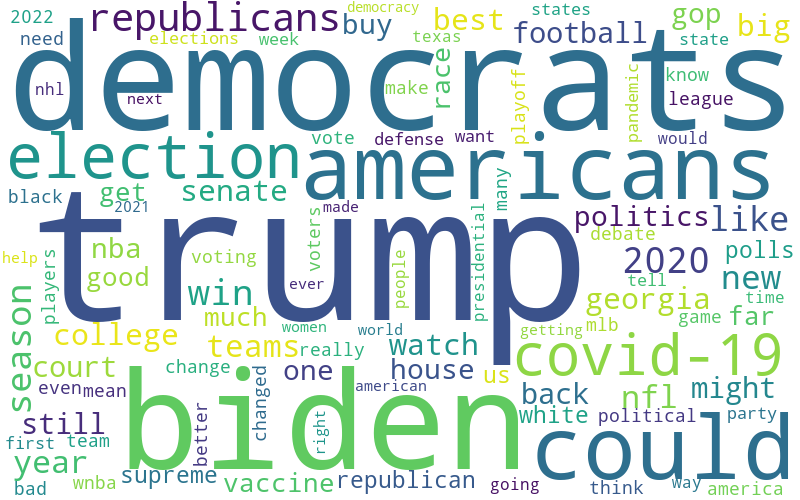

In [ ]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file(f"{outcome_folder}/wordcloud.png")
Image(filename=f"{outcome_folder}/wordcloud.png")